# <font color='green'>1. Import needed packages</font>

Additional needed packages:
- imblearn
- tpot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

# <font color='green'>2. Importing and understanding the data</font>

In [2]:
df= pd.read_csv('Kaggledata.csv', low_memory=False)
df=df.fillna(0)
display(df)

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,Unnamed: 57
0,1,b69acb3bb133974e48229627663f96d4,332,224,8450,8.0,0,16896,8192,0,...,3.492126,3.492126,3.492126,864.000000,864.0,864,72,0,1,0.0
1,2,1cbee4b3725629bd0aa6ac2ff500925f,332,224,258,9.0,0,84480,25600,0,...,3.486827,3.486827,3.486827,892.000000,892.0,892,72,0,1,0.0
2,3,b7027cf0cd31c820928950cbfe7e91ef,332,224,8450,8.0,0,4608,3584,0,...,3.517270,3.517270,3.517270,952.000000,952.0,952,72,0,1,0.0
3,4,156a0bb069f94d1e7c2508318805f2a4,332,224,8450,10.0,0,108544,15872,0,...,3.270559,3.034188,3.506931,1032.000000,972.0,1092,72,0,1,0.0
4,5,c72bf851fed5542abba904b1f3944cd5,332,224,8226,48.0,0,513024,2048,0,...,3.420977,3.420977,3.420977,954.000000,954.0,954,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216347,216348,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11.0,0,205824,223744,0,...,4.122736,1.370260,7.677091,14900.714286,16.0,81654,72,0,0,0.0
216348,216349,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2.0,25,37888,185344,0,...,3.377663,2.031619,5.050074,6905.846154,44.0,67624,0,15,0,0.0
216349,216350,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10.0,0,118272,380416,0,...,6.825406,2.617026,7.990487,14981.909091,48.0,22648,72,14,0,0.0
216350,216351,4286dccf67ca220fe67635388229a9f3,332,224,33166,2.0,25,49152,16896,0,...,3.421627,2.060964,4.739744,601.600000,16.0,2216,0,0,0,0.0


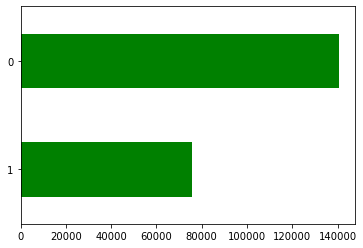

In [3]:
df['legitimate'].value_counts(sort=True, ascending=True).plot(kind='barh',color='green');
plt.savefig('plot0.png', dpi=300, bbox_inches='tight',transparent =True)

In [4]:
df['legitimate'].value_counts(sort=True, ascending=True)

1     75503
0    140849
Name: legitimate, dtype: int64

# <font color='green'>3. First manual Classifier and studying of the results </font>

In [5]:
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import make_scorer, SCORERS
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 

In [6]:
#Balancing data using the SMOTE oversampler to get better and less biased results
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

variables=['Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy',
       'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'ResourcesMeanSize',
       'ResourcesMinSize', 'ResourcesMaxSize', 'LoadConfigurationSize',
       'VersionInformationSize']

X= df.loc[:,variables] 
y= df.loc[:,'legitimate']

#Oversampling the data
sampling = RandomUnderSampler(sampling_strategy='auto')
#sampling = SMOTE(sampling_strategy='auto')
X, y = sampling.fit_resample(X,y)

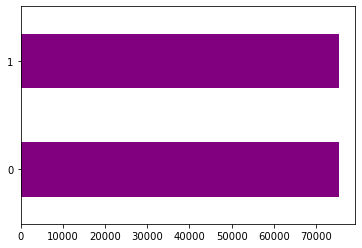

In [7]:
y.value_counts(sort=True, ascending=True).plot(kind='barh',color='purple');
plt.savefig('Undersampled.png', dpi=300, bbox_inches='tight',transparent =True)

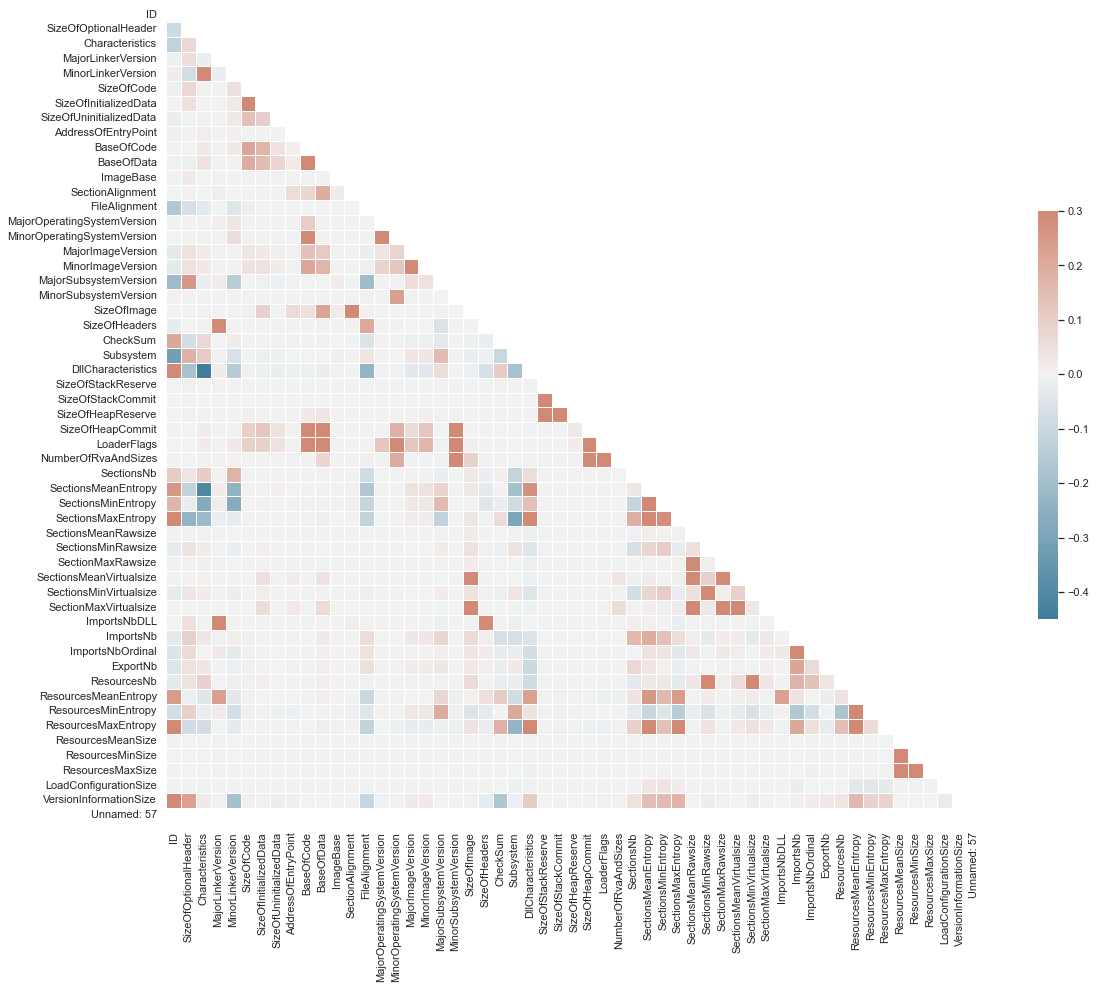

In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.drop("legitimate", axis='columns').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight',transparent =True)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, svd_solver='arpack')
X=pca.fit_transform(X)
display(X)

array([[-9.77932668e+14, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.77932668e+14,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.77932668e+14, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.77930586e+14,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-9.77930585e+14,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-9.77930751e+14, -0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Score: 0.8716785590119696


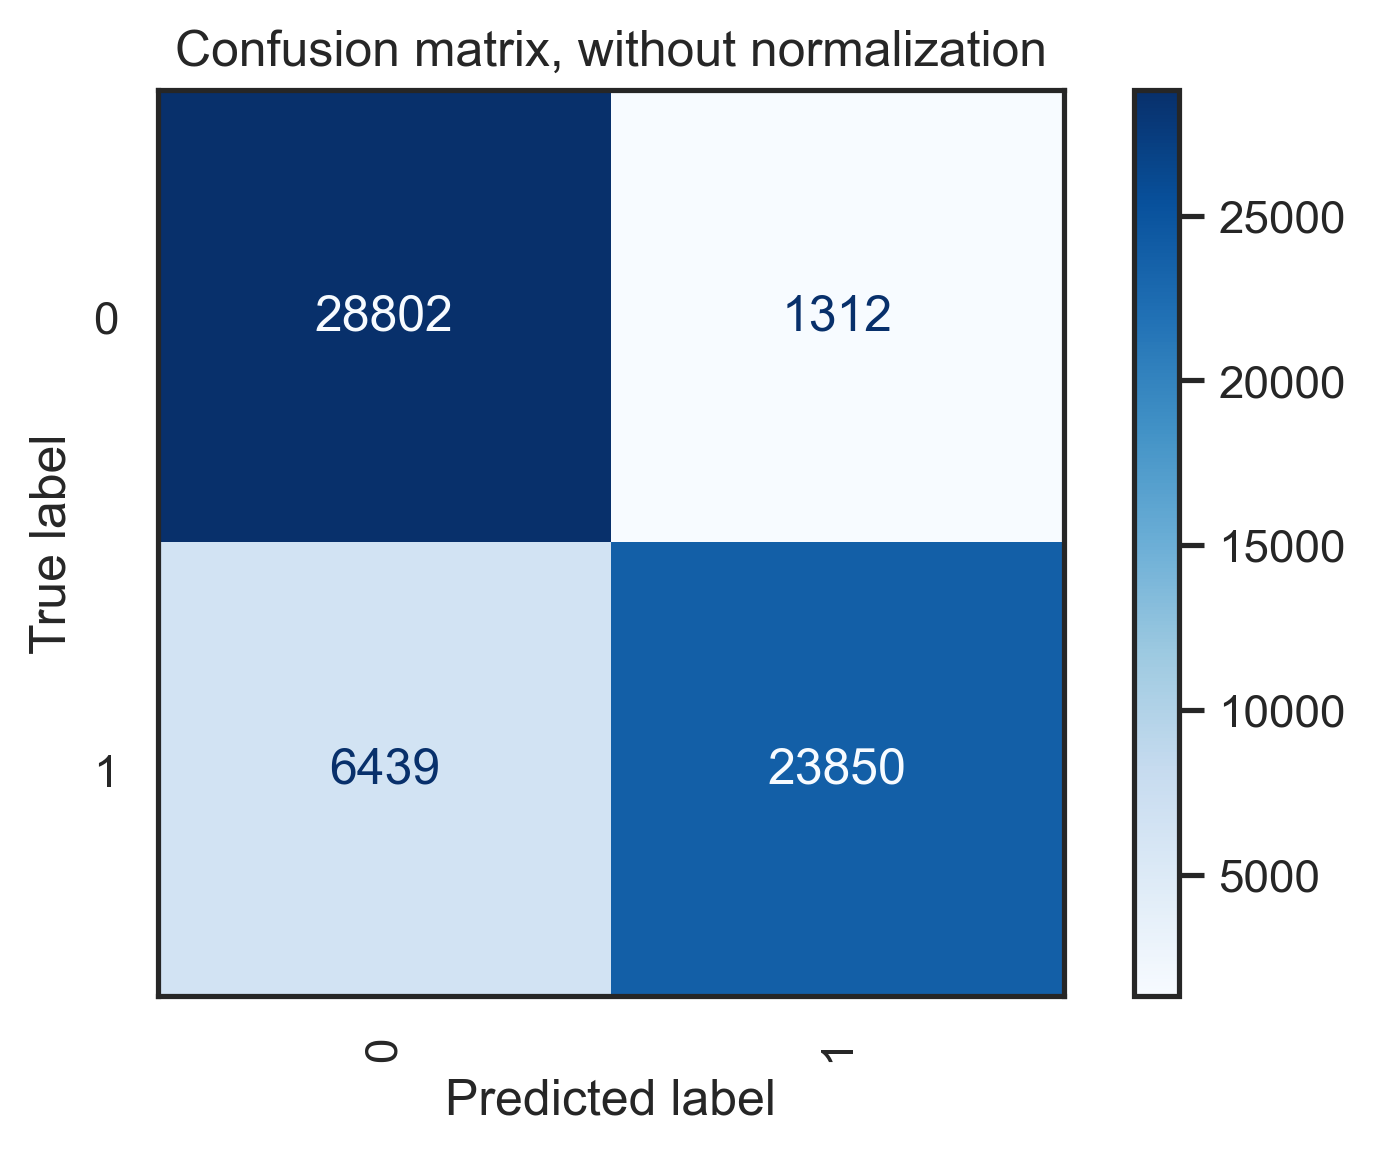

In [10]:
kf=StratifiedKFold(n_splits=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=5) # 60% training and 40% test

# Create Decision Tree classifer object
clf = RandomForestClassifier(n_jobs=-1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

print('Score: '+str(clf.score(X_test, y_test)))

#Predict the response for test dataset
y_pred = clf.predict_proba(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]
y_predX = clf.predict_proba(X)[::,1]
y_predent = clf.predict_proba(X_train)[::,1]

# print(y_pred) 

fig, ax = plt.subplots(dpi=300)

disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                 cmap=plt.cm.Blues, xticks_rotation='vertical', normalize=None, ax=ax)
disp.ax_.set_title("Confusion matrix, without normalization")

plt.show()

#plt.savefig('Confusion_matrix.png', dpi=300, bbox_inches='tight',transparent =True)

# <font color='green'>4. Manual Classifier and manual Hyperparameter tunning (RandomizedSearchCV)</font>

In [11]:
kf=StratifiedKFold(n_splits=5)

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    SVC()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=kf)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc['Mean Accuracy'] = acc['Mean Accuracy'].astype(float).map(lambda n: '{:.2%}'.format(n))
acc['Standard deviation'] = acc['Standard deviation'].astype(float).map(lambda n: '{:.2%}'.format(n))
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,87.15%,2.42%
RandomForestClassifier,87.15%,2.42%
SVC,50.01%,0.01%


In [12]:
#Hyperparameters tuning with RandomizedSearchCV

n_estimators = [100,200,500,1000]
max_depth = [3, 4, 5, 6]
min_weight_fraction_leaf=list(np.arange(0.01, 0.12, 0.005))
criterion=['gini','entropy'] 
max_features=['sqrt','log2', None]
bootstrap = [True,False]

hyperF = dict(max_depth = max_depth, 
              n_estimators = n_estimators,   
              min_weight_fraction_leaf = min_weight_fraction_leaf,
              max_features = max_features,
              criterion = criterion, 
              bootstrap = bootstrap)

est = RandomForestClassifier() 

grid_obj=RandomizedSearchCV(est, hyperF, n_iter=5, scoring='accuracy',random_state=3,
                            n_jobs=-1, cv=kf, verbose = 2, return_train_score=True)

grid_fit=grid_obj.fit(X_train,y_train) 

df_cv=pd.DataFrame.from_dict(grid_fit.cv_results_)
df_cv=df_cv.sort_values(by=['mean_test_score'], ascending=False)

print('Score CV Test: '+str(grid_fit.best_score_),
      '\n','Score CV Training : '+str(df_cv['mean_train_score'][0]),
      '\n',grid_fit.best_params_)

est = RandomForestClassifier(**grid_fit.best_params_, random_state = 5, verbose = 0, n_jobs=-1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Score CV Test: 0.8718254198262283 
 Score CV Training : 0.8718254352177469 
 {'n_estimators': 100, 'min_weight_fraction_leaf': 0.03, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}


In [13]:
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_weight_fraction_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.467669,0.301577,0.207216,0.008608,100,0.03,log2,5,entropy,True,...,0.871825,0.00328,1,0.87114,0.870864,0.8731,0.872384,0.871639,0.871825,0.00082
1,16.992283,0.225049,0.356172,0.036144,200,0.09,log2,3,entropy,False,...,0.871825,0.00328,1,0.87114,0.870864,0.8731,0.872384,0.871639,0.871825,0.00082
2,41.206801,0.080677,0.809401,0.004193,1000,0.11,sqrt,5,entropy,True,...,0.871825,0.00328,1,0.87114,0.870864,0.8731,0.872384,0.871639,0.871825,0.00082
3,10.280962,0.228994,0.178820,0.014099,100,0.01,None,6,gini,True,...,0.871825,0.00328,1,0.87114,0.870864,0.8731,0.872384,0.871639,0.871825,0.00082
4,12.615129,2.289951,0.227938,0.028637,200,0.115,None,5,gini,True,...,0.871825,0.00328,1,0.87114,0.870864,0.8731,0.872384,0.871639,0.871825,0.00082


In [14]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5], # learning rate
    'loss': ['log_loss'], # logistic regression
    'max_iter':[1000,2000,5000,10000],
    'penalty': ['l2']}

est = SGDClassifier() 

grid_obj=RandomizedSearchCV(est, grid, n_iter=50, scoring='accuracy',random_state=3,
                            n_jobs=-1, cv=kf, verbose = 2, return_train_score=True)

grid_fit=grid_obj.fit(X_train,y_train) 

df_cv=pd.DataFrame.from_dict(grid_fit.cv_results_)
df_cv=df_cv.sort_values(by=['mean_test_score'], ascending=False)

print('Score CV Test: '+str(grid_fit.best_score_),
      '\n','Score CV Training : '+str(df_cv['mean_train_score'][0]),
      '\n',grid_fit.best_params_)

est = SGDClassifier(**grid_fit.best_params_, random_state = 5, verbose = 0, n_jobs=-1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Score CV Test: 0.5010099011879062 
 Score CV Training : 0.5001931458832012 
 {'penalty': 'l2', 'max_iter': 5000, 'loss': 'log_loss', 'alpha': 0.0001}


# <font color='green'>5. Automated Classifier and Hyperparameter tunning with TPOT-AutoML</font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from tpot import TPOTClassifier

# Define TPOT classifier
tpot_model = TPOTClassifier(generations=5, population_size=5, 
                            periodic_checkpoint_folder="tpot_mnst1.txt", verbosity=2, 
                            random_state=42, cv = kf, scoring = 'accuracy', n_jobs=-1, config_dict=None) 

# Fit/start training
tpot_model.fit(X_train, y_train)
print('Done training/fitting TPOT session.')

# Get TPOT's score on test set (default metric is 'accuracy'; define something else in TPOT classifier if needed)
print('TPOTs score on test set is...')
print(tpot_model.score(X_test, y_test))

# Export the best pipeline
tpot_model.export('tpot_best_pipeline.py')

# Create sorted by CV (highest to lowest) dataframe 
my_dict = list(tpot_model.evaluated_individuals_.items())
# Create an empty dataframe to append the model strings, model info strings and CV score strings to
model_scores = pd.DataFrame()
for model in my_dict:
    model_name = model[0]
    model_info = model[1] # You could take this out if the values of the pipeline aren't important to you
    cv_score = model[1].get('internal_cv_score')  # Pull out cv_score as a column (i.e., sortable)
    model_scores = model_scores.append({'model': model_name,
                                        'cv_score': cv_score, # You could take this out if the values of the pipeline aren't important to you
                                        'model_info': model_info,},
                                       ignore_index=True)
    
# Sort by best CV score to worst (top to bottom)
model_scores = model_scores.sort_values('cv_score', ascending=False)
print('Model Scores dataframe is...')
print(model_scores)

# Remove duplicate CV score rows and keep top X pipelines (to get best, 'unique' pipelines)
model_scores = model_scores.drop_duplicates(subset ="cv_score", keep = False)